In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

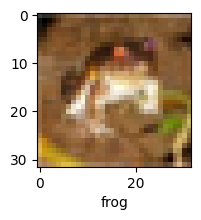

In [6]:
plot_sample(X_train, y_train, 0)

In [7]:
X_train = X_train / 255

In [8]:
X_test = X_test / 255

In [9]:
# very slow
# ann = models.Sequential([
#         layers.Flatten(input_shape=(32,32,3)),
#         layers.Dense(3000, activation='relu'),
#         layers.Dense(1000, activation='relu'),
#         layers.Dense(10, activation='sigmoid')    
#     ])

# ann.compile(optimizer='SGD',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# ann.fit(X_train, y_train, epochs=1)

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4484 - accuracy: 0.4774
Epoch 2/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1001 - accuracy: 0.6123
Epoch 3/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9693 - accuracy: 0.6628
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8793 - accuracy: 0.6944
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8193 - accuracy: 0.7138
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7654 - accuracy: 0.7340
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7120 - accuracy: 0.7503
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6631 - accuracy: 0.7697
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6206 - accuracy: 0.7817
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - l

In [12]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9463 - accuracy: 0.6941


[0.9463346600532532, 0.694100022315979]

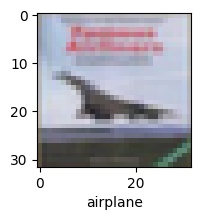

In [13]:
y_test = y_test.reshape(-1)
plot_sample(X_test, y_test, 3)

In [14]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
classes[y_pred[3].argmax(axis=0)]

'airplane'

In [16]:
y_classes = [np.argmax(element) for element in y_pred]

In [17]:
y_classes[0:5] == y_test[0:5]

array([ True,  True,  True,  True,  True])

In [18]:
from sklearn.metrics import confusion_matrix , classification_report

In [19]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.84      0.77      0.80      1000
           2       0.68      0.51      0.58      1000
           3       0.50      0.51      0.50      1000
           4       0.57      0.73      0.64      1000
           5       0.71      0.47      0.57      1000
           6       0.73      0.82      0.77      1000
           7       0.74      0.77      0.75      1000
           8       0.82      0.79      0.80      1000
           9       0.67      0.86      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [20]:
classes[8]

'ship'

In [36]:
import tensorflow as tf
from tensorflow import keras
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
hw_cnn = keras.models.Sequential([
    layers.Conv1D(filters=28, kernel_size=(3), activation='relu', input_shape=(28, 28)),
    layers.MaxPooling1D((2)),
    
    layers.Conv1D(filters=56, kernel_size=(3), activation='relu'),
    layers.MaxPooling1D((2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
hw_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
hw_cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1664 - accuracy: 0.8694
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1849 - accuracy: 0.9493
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1286 - accuracy: 0.9635
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1002 - accuracy: 0.9707
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0846 - accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0753 - accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0690 - accuracy: 0.9800
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0596 - accuracy: 0.9823
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0564 - accuracy: 0.9836
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.053

In [26]:
hw_cnn.evaluate(X_test, y_test)

313/313 [==============================] - 0s 858us/step - loss: 0.0837 - accuracy: 0.9784


[0.08374057710170746, 0.9783999919891357]

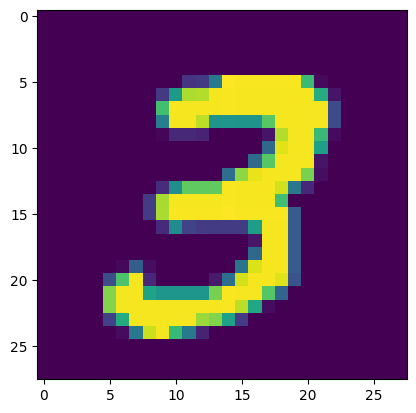

In [27]:
plt.imshow(X_train[7])

In [28]:
X_train = X_train / 255
X_test = X_test / 255

In [31]:
X_train.shape

(60000, 28, 28)

In [39]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [40]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [41]:
hw_cnn = keras.models.Sequential([
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [42]:
hw_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hw_cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4277 - accuracy: 0.9350
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0816 - accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0563 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0413 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0344 - accuracy: 0.9896


In [43]:
hw_cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9787


[0.07937008887529373, 0.9786999821662903]

In [44]:
y_pred = hw_cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [45]:
y_pred[0]

array([0.23152101, 0.97377104, 0.9323675 , 0.97127736, 0.22654085,
       0.73159665, 0.00302825, 0.9999999 , 0.33826172, 0.98734784],
      dtype=float32)

In [46]:
y_pred = [np.argmax(i) for i in y_pred]

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.87      0.99      0.93      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.86      0.90       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Text(95.72222222222221, 0.5, 'Truth')

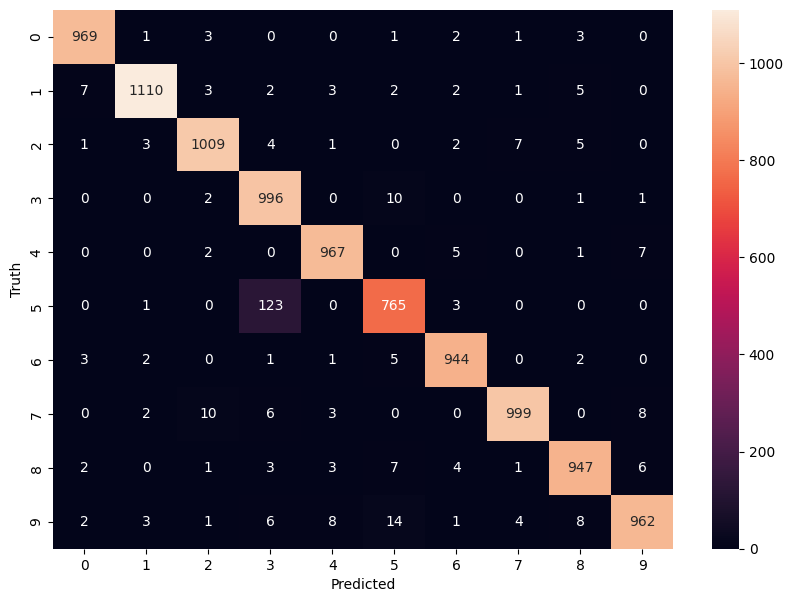

In [48]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)

In [59]:
a = np.array([[1,2, 3],[3,4, 5]])
a.shape

(2, 3)

In [60]:
a.reshape(-1, 2, 3, 1)

array([[[[1],
         [2],
         [3]],

        [[3],
         [4],
         [5]]]])